# Laboratório #3

### Instruções

1. Antes de começar, você deve clicar na opção "Copiar para o Drive" na barra superior do Colab. Depois de clicar nela, verifique se você está trabalhando nessa versão do notebook para que seu trabalho seja salvo.
2. Quando você terminar os exercícios do laboratório, vá ao menu do Colab ou Jupyter e selecione a opção para fazer download do notebook.
    * Os notebooks tem extensão .ipynb.
    * Este deve ser o arquivo que você irá entregar.
    * No Colab vá até a opção **File** -> **Download .ipynb**.
    * No Jupyter vá até a opção **File** -> **Download as** -> **Notebook (.ipynb)**.
3. Após o download do notebook, vá até a aba de tarefas do MS Teams, localize a tarefa referente a este laboratório e faça o upload do seu notebook. Veja que há uma opção de anexar arquivos à tarefa.
4. Não se esqueça de colocar seu **nome** e **matrícula** na célula de texto abaixo.

**Nome**:

**Matrícula**:

## Exercícios

### 1)  Neste exercício, você irá encontrar a solução ótima para um problema de regressão linear utilizando a versão em mini-batches do algoritmo do gradiente descendente.

Dada a seguinte **função observável**

$$y_{noisy}(n) = y(n) + w(n),$$

onde $w$ é vetor coluna com $N = 1000$ (ou seja, o número de exemplos) valores retirados de uma distribuição aleatória Gaussiana com média 0 e variância igual a 8 e $y$ é a **função objetivo**. Neste exercício, a **função objetivo** (ou **modelo gerador**) é dada por:

$$y(n) = x_1(n) + x_2(n),  $$

onde $x_1$ é um vetor coluna com $N$ valores retirados de uma **distribuição Gaussiana** com média 0 e variância unitária e $x_2$ é outro vetor coluna com $N$ valores retirados de uma **distribuição Gaussiana** com média 0 e variância igual a 4.

A **função hipótese** para este exercício deve ser

$$h(n) = \hat{a}_1 x_1(n) + \hat{a}_2 x_2(n).$$

**DICAS**:

+ A biblioteca `numpy` fornece uma função chamada `rand` para geração de valores aleatórios retirados de uma distribuição uniforme. Seu uso é idêntico ao da função `randn`, a qual gera valores retirados de uma distribuição Gaussiana Normal Padrão (ou seja, com média zero e variância unitára). O código abaixo gera um vetor coluna com 100 linhas e 1 coluna com valores retirados de uma distribuição uniforme no intervalo de $0$ a $100$.
```python
import numpy as np
x = 100*np.random.rand(100,1)
```
+ O mesmo pode ser feito para gerar vetores com a função `randn`, para isso, apenas troque `rand` por `randn` no exemplo acima.
+ Para gerar um vetor com valores retirados de uma variável aleatória Gaussiana com variância igual a `var`, multiplique o vetor pela raíz quadrada da variância, por exemplo
```python
x = np.sqrt(var)*np.random.randn(N,1)
```
+ Para resolver as questões 1, 2, 3 e 5 deste exercício, se baseie no código do exemplo da Parte II de regressão linear: [exemplo_gradiente_descendente_em_batelada.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/main/notebooks/regression/gd_versions/exemplo_gradiente_descendente_em_batelada.ipynb).
+ Não se esqueça de importar as bibliotecas necessárias. Veja o exemplo.

De posse destas informações, faça o seguinte:

1. Gere e plote a **função observável**, $y_{noisy}$, em função dos atributos $x_1$ e $x_2$. Note que este será um gráfico 3D.

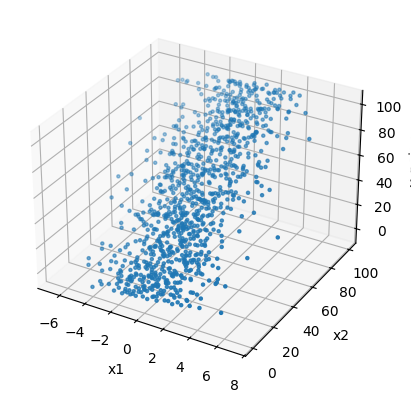

In [1]:
# Digite aqui o código do exercício.
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1) Dados
N = 1000
# x1 ~ N(0,4), x2 ~ Uniform[0,100], w ~ N(0,1)
x1 = np.sqrt(4) * np.random.randn(N,1)
x2 = 100 * np.random.rand(N,1)
y_clean = x1 + x2
w = np.random.randn(N,1)
y_noisy = y_clean + w

# Plot 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y_noisy, s=5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y_noisy')
plt.show()


2. Plote a **superfície de erro**. Note que este será um gráfico 3D.

**DICAS**:

+ Use a função `calculateErrorSurface` do exemplo para calcular os valores necessários para plotar a superfície de erro.

+ Para plotar a superfície de erro, faça as variáveis $a_1$ e $a_2$ variarem de $-4$ até $6$, respectivamente. Altere esses valores das variáveis na definição da função `calculateErrorSurface`.

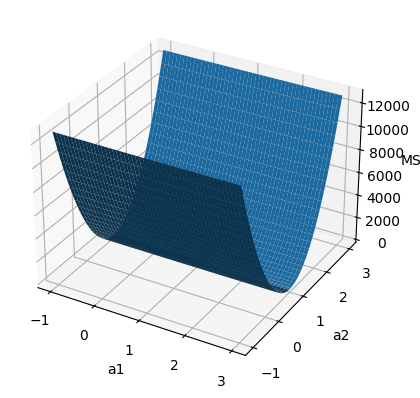

In [2]:
# Digite aqui o código do exercício.
def calculate_error_surface(x1, x2, y, a1_range, a2_range):
    A1, A2 = np.meshgrid(a1_range, a2_range)
    mse = np.zeros_like(A1)
    for i in range(A1.shape[0]):
        for j in range(A1.shape[1]):
            y_pred = A1[i,j]*x1 + A2[i,j]*x2
            mse[i,j] = np.mean((y_pred - y)**2)
    return A1, A2, mse

# Faixa de pesos para a1 e a2
a1_range = np.linspace(-1, 3, 50)
a2_range = np.linspace(-1, 3, 50)

A1, A2, MSE = calculate_error_surface(x1, x2, y_noisy, a1_range, a2_range)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A1, A2, MSE, edgecolor='none')
ax.set_xlabel('a1')
ax.set_ylabel('a2')
ax.set_zlabel('MSE')
plt.show()


3. Plote os histogramas normalizados de $x_1$ e $x_2$ e verifique se eles têm intervalos de variação similares ou não.

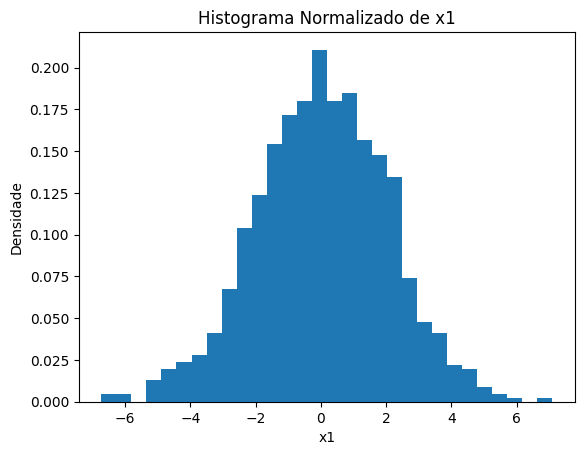

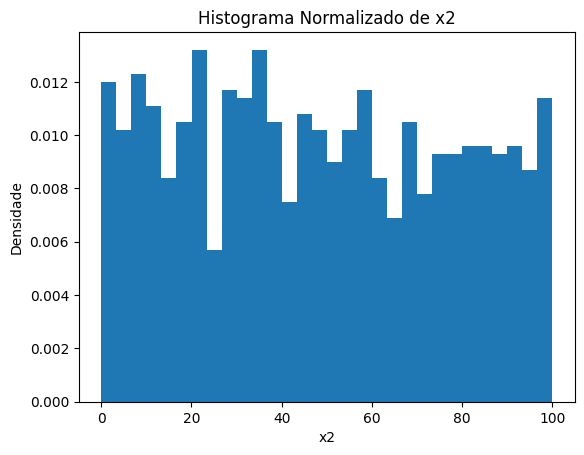

In [3]:
# Digite aqui o código do exercício.
plt.figure()
plt.hist(x1.flatten(), bins=30, density=True)
plt.title('Histograma Normalizado de x1')
plt.xlabel('x1'); plt.ylabel('Densidade')
plt.show()

plt.figure()
plt.hist(x2.flatten(), bins=30, density=True)
plt.title('Histograma Normalizado de x2')
plt.xlabel('x2'); plt.ylabel('Densidade')
plt.show()


4. Explique porque a superfície de erro tem a forma de um vale, se assemelhando a um `V` ou `U`.

**DICAS**:

+ Analise os resultados do item anterior (histogramas dos atributos) e leia o aquivo [Variações do formato da
superfície de erro](https://github.com/zz4fap/t319_aprendizado_de_maquina/blob/main/slides/T319_Regress%C3%A3o_Linear%20(Varia%C3%A7%C3%B5es%20do%20formato%20da%20superf%C3%ADcie%20de%20erro).pdf).

**Resposta**

<span style="color:blue">Digite aqui a resposta do exercício: A superfície de erro é o MSE médio em função dos dois parâmetros â1 e â2, como o MSE é uma soma de termos quadráticos (â1*x1 + â2*x2 - y)^2, ele cresce conforme nos afastamos da combinação que zera o erro médio, formando um vale convexo de contorno aproximadamente quadrático.</span>

5. Encontre a solução ótima para este problema de regressão linear utilizando a **equação normal**. Em seguida, imprima os valores encontrados para os **pesos**, $\hat{a}_1$ e $\hat{a}_2$, e o valor do **erro quadrático médio**.

**DICAS**

+ Use a função `calculateClosedFormSolution` do exemplo.

In [6]:
# Digite aqui o código do exercício.
# Montar matriz de projeto e resolver por equações normais
X = np.hstack([x1, x2])
theta_opt = np.linalg.inv(X.T @ X) @ X.T @ y_noisy
a1_opt, a2_opt = theta_opt.flatten()

mse_opt = np.mean((X @ theta_opt - y_noisy)**2)
print(f"ˆa1 = {a1_opt:.4f}, ˆa2 = {a2_opt:.4f},  MSE = {mse_opt:.4f}")


ˆa1 = 0.9833, ˆa2 = 1.0005,  MSE = 1.0187


6. Execute a célula abaixo, analise o código e os resultados mostrados nas duas figuras. Neste exercício, utilizamos a versão em mini-batches do gradiente descendente (GD), a qual é implementada pela função `gradientDescentMiniBatch` abaixo.

**DICAS**:
+ Para que o código da célula abaixo funcione corretamente, é necessário que você tenha resolvido as questões anteriores.
+ Lembre-se que a versão em mini-batches do gradiente descendente (GD) pode ser configurada para operar como gradiente descendente em batelada ou gradiente descendente estocástico, bastando apenas que se modifique o tamanho do conjunto de amostras do mini-batch.

<ipython-input-8-335e51bad11e>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))
<ipython-input-8-335e51bad11e>:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Jgd[inc+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))
<ipython-input-8-335e51bad11e>:55: RuntimeWarning: overflow encountered in power
  Jgd[inc+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))
<ipython-input-8-335e51bad11e>:55: RuntimeWarning: overflow encountered in add
  Jgd[inc+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))
<ipython-input-8-335e51bad11e>:52: RuntimeWarning: invalid value encountered in subtra

NameError: name 'J' is not defined

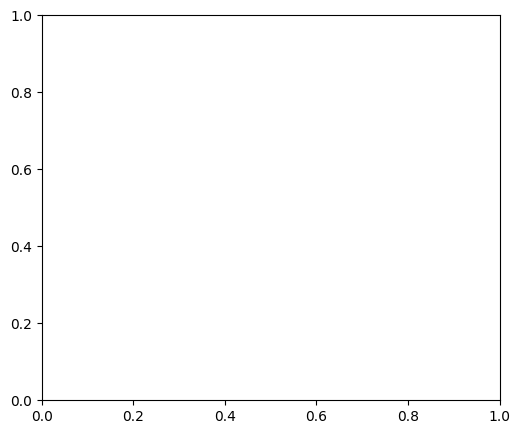

In [8]:
import random

def gradientDescentMiniBatch(X, y_noisy, alpha, n_epochs, N, mb_size):
    '''
    Função que implementa o algoritmo do gradiente descendente em mini-batches.
    Parâmetros de entrada:
       X: matriz de atributos
       y_noisy: vetor de rótulos (ou valores esperados)
       alpha: passo de aprendizagem
       n_epochs: número máximo de épocas
       N: número de exemplos do conjunto de treinamento
       mb_size: tamanho do mini-batch
    '''
    # Random initialization of parameters.
    a = np.array([-3.0, -3.0]).reshape(2, 1)

    # Create vector for parameter history.
    a_hist = np.zeros((2, n_epochs*(N//mb_size)+1))
    # Initialize history vector.
    a_hist[:, 0] = a.reshape(2,)

    # Create array for storing error values.
    Jgd = np.zeros(n_epochs*(N//mb_size)+1)

    Jgd[0] = (1.0/N)*sum(np.power(y_noisy - X.dot(a), 2))

    # Create array for storing gradient values.
    grad_hist = np.zeros((2, n_epochs*(N//mb_size)))

    # Mini-batch gradient-descent loop.
    inc = 0
    for e in range(n_epochs):

        # Shuffle the whole dataset before every epoch.
        shuffled_data_set_indexes = random.sample(range(0, N), N)

        for i in range(0, N//mb_size):

            # Select the indices for the mini-batch with the pre-defined number of samples.
            start = i*mb_size
            end = mb_size*(i+1)
            batch_indexes = shuffled_data_set_indexes[start:end]

            # Create the mini-bacth by using the selected indices.
            xi = X[batch_indexes]
            yi = y_noisy[batch_indexes]

            # Calculate the gradient vector.
            gradients = -(2.0/mb_size)*xi.T.dot(yi - xi.dot(a))

            # Update the weights.
            a = a - alpha*gradients

            # Calculate the MSE for the new weights.
            Jgd[inc+1] = (1.0/N)*sum(np.power((y_noisy - X.dot(a)), 2))

            # Store new weights and gradient vector into arrays.
            grad_hist[:, inc] = gradients.reshape(2,)
            a_hist[:, inc+1] = a.reshape(2,)

            # Increment the iteration.
            inc = inc + 1

    return a, Jgd, a_hist, grad_hist, inc

# Number of epochs.
n_epochs = 2

# Learning rate.
alpha = 0.002

# Mini-batch size.
mb_size = 1

# Call function that implements the mini-batch.
a, Jgd, a_hist, grad_hist, inc = gradientDescentMiniBatch(X, y_noisy, alpha, n_epochs, N, mb_size)

# Plot contour figure.
fig = plt.figure(figsize=(13,5))

ax1 = fig.add_subplot(121)
cp = plt.contour(A1, A2, J)
ax1.clabel(cp, inline=1, fontsize=10)
ax1.set_xlabel('$a_1$', fontsize=14)
ax1.set_ylabel('$a_2$', fontsize=14)
ax1.set_title('Contorno da função de custo')
ax1.plot(a_opt[0], a_opt[1], c='r', marker='*')
ax1.plot(a_hist[0, 0:inc+1], a_hist[1, 0:inc+1], 'kx')
ax1.set_xticks(np.arange(-4, 7, step=1.0))
ax1.set_yticks(np.arange(-4, 7, step=1.0))

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, inc+1), Jgd[0:inc+1])
ax2.set_xlim((0, inc+1))
ax2.set_ylim((7, 10))
ax2.set_yscale('log')
ax2.set_xlabel('Iteração', fontsize=14)
ax2.set_ylabel('$J_e$', fontsize=14)
ax2.set_title('Erro vs. Iteração')
ax2.grid()

plt.show()

Após analisar os resultados acima, responda:

1. Lembrando-se que o GD em mini-batches pode ser visto como uma generalização do GD em batelada e estocástico, diga qual é a versão sendo usada neste exercício. Qual parâmetro você observou para chegar a esta conclusão? (**Dica**: Leia o slide 30 da parte II de regressão linear.)
2. O algoritmo converge de forma estável para o mínimo da função de erro?
3. Por que o algoritmo tem esse comportamento?
4. O que pode ser feito para melhorar este comportamento? (**Dica**: Lembre-se que com o gradiente descendente em mini-lotes a estimativa do vetor gradiente melhora conforme o tamanho do mini-lote aumenta, o que, consequentemente, aumenta a chance de convergência.)

**Resposta**

<span style="color:blue">Digite abaixo as respostas do exercício.
1: Porque ele calcula o gradiente em pequenos lotes de dados (não em todo o conjunto, como no GD em batch, nem numa única amostra, como no estocástico), equilibrando ruído e custo computacional.

2: Em geral sim. O erro médio diminui epoch a epoch, mas há flutuações por causa da amostragem aleatória dos mini‑batches.

3: Porque o gradiente em cada lote contém ruído amostral. Isso acelera a convergência inicial mas causa pequenas oscilações ao redor do mínimo.

4: Ajuste cuidadoso de tamanho de lote e taxa de aprendizado. Lotes muito pequenos geram ruído excessivo, lotes muito grandes aproximam muito o GD em batch (mais caro).</span>

7. Execute a célula abaixo, analise o código e os resultados mostrados nas duas figuras. Neste exercício, utilizamos novamente a versão em mini-batches do gradiente descendente (GD), a qual é implementada pela função `gradientDescentMiniBatch`.

**DICA**:
+ Para que o código da célula abaixo funcione corretamente, é necessário que você tenha resolvido as questões anteriores.

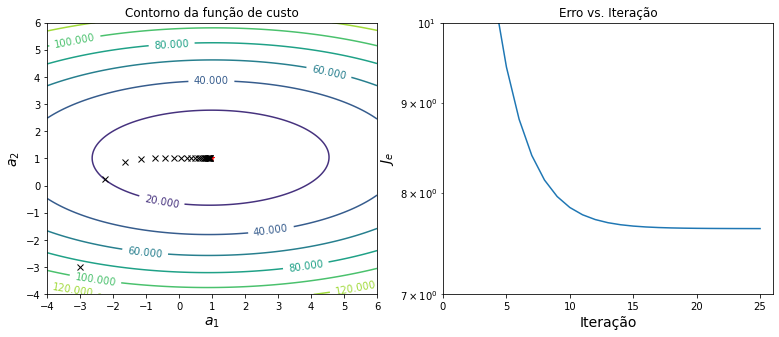

In [ ]:
# Number of epochs.
n_epochs = 25

# Learning rate.
alpha = 0.1

# Mini-batch size.
mb_size = 1000

# Call function that implements the mini-batch.
a, Jgd, a_hist, grad_hist, inc = gradientDescentMiniBatch(X, y_noisy, alpha, n_epochs, N, mb_size)

# Plot contour figure.
fig = plt.figure(figsize=(13,5))

ax1 = fig.add_subplot(121)
cp = plt.contour(A1, A2, J)
ax1.clabel(cp, inline=1, fontsize=10)
ax1.set_xlabel('$a_1$', fontsize=14)
ax1.set_ylabel('$a_2$', fontsize=14)
ax1.set_title('Contorno da função de custo')
ax1.plot(a_opt[0], a_opt[1], c='r', marker='*')
ax1.plot(a_hist[0, 0:inc+1], a_hist[1, 0:inc+1], 'kx')
ax1.set_xticks(np.arange(-4, 7, step=1.0))
ax1.set_yticks(np.arange(-4, 7, step=1.0))

ax2 = fig.add_subplot(122)
ax2.plot(np.arange(0, inc+1), Jgd[0:inc+1])
ax2.set_xlim((0, inc+1))
ax2.set_ylim((7, 10))
ax2.set_yscale('log')
ax2.set_xlabel('Iteração', fontsize=14)
ax2.set_ylabel('$J_e$', fontsize=14)
ax2.set_title('Erro vs. Iteração')
ax2.grid()

plt.show()

Após analisar os resultados acima, responda:

1. Lembrando-se que o GD em mini-batches pode ser visto como uma generalização do GD em batelada e estocástico, diga qual é a versão sendo usada neste exercício. Qual parâmetro você observou para chegar a esta conclusão? (**Dica**: O conjunto de treinamento tem 1000 exemplos. Além disso, leia o slide 30 da parte II de regressão linear.)
2. O algoritmo converge de forma estável para o mínimo da função de erro?
3. Por que o algoritmo tem esse comportamento?
4. Cite uma desvantagem desta versão do GD.

**Resposta**

<span style="color:blue">Digite abaixo as respostas do exercício.</span>

### 2) Neste exercício, você irá usar a classe `SGDRegressor` da biblioteca SciKit-Learn para resolver um problema de regressão linear.

+ A biblioteca Scikit-Learn disponibiliza a classe `SGDRegressor` para realizar regressão linear utilizando o Gradiente Descendente Estocástico.
+ A classe possui vários parâmetros que podem ser configurados (e.g., tipo de função de erro, esquema de variação do passo de aprendizagem, etc.).

O link abaixo contém a versão mais recente da documentação da classe `SGDRegressor`. Antes de resolver o exercício, leia a documentação.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

Em seguida, faça o seguinte:

1. Analise e execute o trecho de código abaixo para gerar o conjunto de treinamento.

**DICAS**

+ Analise como o atributo, $x_1$ é gerado.
+ Analise o modelo gerador (i.e., função objetivo), perceba que ele é a equação de uma reta.

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Número de exemplos.
N = 1000

# Atributo.
x1 = np.random.randn(N, 1)

# Ruído Gaussiano normal padrão.
w = np.random.randn(N, 1)

# Modelo gerador.
y = 2 + 4*x1

# Função observável (i.e., ruidosa).
y_noisy = y + w

2. Crie um gráfico comparando as versões original e ruidosa do modelo gerador.

**DICA**

+ Se baseie no código do exemplo [error_surface_example1.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/error_surface_example1.ipynb) para criar o gráfico solicitado.

In [ ]:
# Escreva o código aqui.

3. Na célula abaixo, **importe** a classe `SGDRegressor` e instancie um objeto desta classe.

**DICA**:

+ Configure o parâmetro `fit_intercept` como `True`, ou seja, o objeto da classe `SGDRegressor` irá concatenar automaticamente o vetor do atributo de bias, $x_0$, (i.e., vetor com valores iguais a 1) ao vetor do atributo $x_1$. Veja abaixo um exemplo de como configurar o parâmetro `fit_intercept`.
```python
sgd = SGDRegressor(fit_intercept=True)
```
+ Se baseie no exemplo a seguir para resolver este item: [SGD_with_scikit_learn_lib.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/gd_versions/SGD_with_scikit_learn_lib.ipynb).

In [ ]:
# Escreva o código aqui.

4. Treine o modelo de regressão linear utilizando o método `fit` do objeto da classe `SGDRegressor`.

**DICA**

+ Se baseie no exemplo a seguir para resolver este item: [SGD_with_scikit_learn_lib.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/gd_versions/SGD_with_scikit_learn_lib.ipynb).

In [ ]:
# Escreva o código aqui.

5. De posse do modelo treinado, use o método `predict` para prever os valores de saída do modelo usando como entrada o vetor do atributo $x_1$. Atribua o resultado da predição a uma variável.

**DICAS**:

+ O vetor $x_1$ foi gerado no item 1 do exercício.
+ Se baseie no exemplo a seguir para resolver este item: [SGD_with_scikit_learn_lib.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/gd_versions/SGD_with_scikit_learn_lib.ipynb).

In [ ]:
# Escreva o código aqui.

6. Usando os valores esperados, ou seja, o vetor `y_noisy`, e os valores de saída do modelo de regressão linear, ou seja, o resultado da predição feita no item anterior, calcule e imprima o erro quadrático médio.

**DICA**:

+ Se baseie no exemplo a seguir para resolver este item: [SGD_with_scikit_learn_lib.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/gd_versions/SGD_with_scikit_learn_lib.ipynb).

In [ ]:
# Escreva o código aqui.

7. Imprima os valores dos pesos do modelo obtidos com o treinamento através do gradiente descendente estocástico.

**DICAS**:
+ Perceba que o modelo gerador, usado no item 1 deste exercício para gerar os dados de treinamento, possui o peso de *bias* ou *intercept*, `a0`. Portanto, para acessar o valor deste peso, você precisa usar o atributo `intercept_` do objeto da classe `SGDRegressor`.
+ O peso `a1`, aquele associado ao atributo `x1`, é acessado através do primeiro elemento do atributo `coef_` do objeto da classe `SGDRegressor`.
+ Se baseie no exemplo a seguir para resolver este item: [SGD_with_scikit_learn_lib.ipynb](https://colab.research.google.com/github/zz4fap/t319_aprendizado_de_maquina/blob/master/notebooks/regression/gd_versions/SGD_with_scikit_learn_lib.ipynb).

In [ ]:
# Escreva o código aqui.

8. Crie um gráfico comparando as funções objetivo (i.e., modelo gerador), observável (i.e., ruidosa) e hipótese (i.e., a saída do modelo de regressão linear obtido com o gradiente descendente estocástico).

**DICA**
+ Para gerar este gráfico, use o código do item 2 acrescentando o `plot` dos valores obtidos com a predição feita no item 5.
+ Veja o exemplo abaixo:
```python
plt.plot(x1, y_noisy, 'r', label='Função observável')
plt.plot(x1, y, 'r', label='Função objetivo')
plt.plot(x1, y_pred, 'r', label='Função hipótese')
plt.xlabel('$x_1$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.grid()
plt.legend()
plt.show()
```

In [ ]:
# Escreva o código aqui.

9. Analise a figura acima e responda:

+ A função hipótese se aproxima da função objetivo?

**Resposta**

<span style="color:blue">Digite abaixo a resposta do exercício.</span>